In [1]:
from scripts.figures_import_helper import *
%matplotlib inline

before/after industry comparisons, using national data

In [2]:
filename = 'municipal_pub_reserve_no_pricefloor.csv'

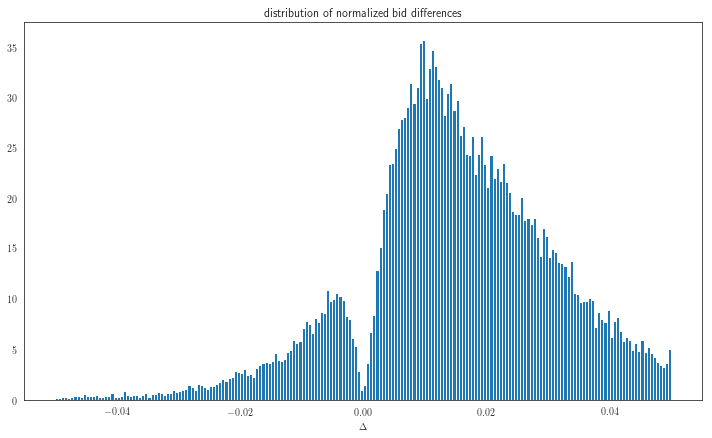

In [3]:
filter_ties = auction_data.FilterTies(tolerance=.0001)

data = filter_ties(
    auction_data.AuctionData(os.path.join(path_data, filename)))
plot_delta(data)

In [4]:
data.df_bids.head()

,pid,norm_bid,bid,reserveprice,lowest,second_lowest,most_competitive
0,32848.0,0.900438,66600000,73964000,0.900438,0.904494,0.904494
1,32062.0,0.997915,3350000,3357000,0.977063,0.994936,0.977063
2,34164.0,0.975607,101550000,104089000,0.903073,0.907877,0.903073
3,136907.0,0.962980,2750000,2855720,0.938467,0.952474,0.938467
4,96724.0,0.924216,7580000,8201550,0.920558,0.924216,0.920558


In [5]:
num_auctions_by_bidder = data.data.groupby('bidder_id').size()
top30_bidders = num_auctions_by_bidder.sort_values(ascending=False).head(30)
top30_bidders = top30_bidders.index
top30_bidders

Int64Index([ 6318, 23259, 20391,  4536, 20989, 17152,  7721, 18868, 14396,
            22655, 24265, 21981, 14247, 15668, 23249, 19818, 13238, 23431,
            17111, 23458, 25258, 17628, 25808, 22199, 23224, 25547, 25122,
            12519, 11396, 19381],
           dtype='int64', name='bidder_id')

In [9]:
deviations = [-.025, .0, .001]
list_solutions = []
for i, bidder in enumerate(top30_bidders):    
    print('firm {}'.format(i + 1))
    data_firm = auction_data.AuctionData.from_clean_bids(
        data.df_bids.loc[data.data.bidder_id == bidder])
    demand_firm = data_firm.assemble_target_moments(deviations)
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.05)]

    min_collusion_solver = solvers.ParallelSolver(
        data=data_firm,
        deviations=deviations,
        metric=analytics.IsNonCompetitive,
        plausibility_constraints=constraints,
        num_points=NUM_POINTS,
        seed=0,
        project=False,
        filter_ties=None,
        num_evaluations=NUM_EVAL,
        confidence_level=1 - .05 / len(deviations),
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.identity(len(deviations))
    )
    
    list_solutions.append([i, bidder, min_collusion_solver.result.solution])

firm 1
firm 2
firm 3
firm 4
firm 5
firm 6
firm 7
firm 8
firm 9
firm 10
firm 11
firm 12
firm 13
firm 14
firm 15
firm 16
firm 17
firm 18
firm 19
firm 20
firm 21
firm 22
firm 23
firm 24
firm 25
firm 26
firm 27
firm 28
firm 29
firm 30


In [10]:
print('saving data\n')
save2frame(list_solutions,
           ['rank', 'bidder_id', 'share competitive'],
           'R2/city_auctions_individual_firms')

saving data

